In [ ]:
import warnings
# Ignore all warnings (not recommended in general)
warnings.filterwarnings('ignore')

# Classifiers

In [2]:
import pandas as pd

# Load the CSV file
data = pd.read_csv('cat_food_prepared.csv')

# Show general information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company         164 non-null    object 
 1   price           164 non-null    float64
 2   weight          164 non-null    float64
 3   star_rating     164 non-null    float64
 4   total_comments  164 non-null    float64
 5   chicken         164 non-null    int64  
 6   from_ocean      164 non-null    int64  
 7   fish            164 non-null    int64  
 8   tuna            164 non-null    int64  
 9   salmon          164 non-null    int64  
 10  mackerel        164 non-null    int64  
 11  shrimps         164 non-null    int64  
 12  liver           164 non-null    int64  
 13  turkey          164 non-null    int64  
 14  ham             164 non-null    int64  
 15  vegan           164 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 20.6+ KB


In [3]:
row = ['whiskas', 'farmina', 'me-o', 'royal', 'purepet', 'purina', 'meat', 'sheba']

# Step 1: Use the Pandas 'get_dummies' function for one-hot encoding
data = pd.get_dummies(data[data.company.isin(row)], columns=['company'])

data.shape

(121, 23)

In [4]:
# Create the 'yummy' column
data['yummy'] = (data['star_rating'] >= 4.5).astype(int)

# Check the first few rows to confirm
print(data.head())


    price  weight  star_rating  total_comments  chicken  from_ocean  fish  \
0   189.0     1.2          4.2          8285.0        0           1     0   
1   879.0     7.0          4.3         11737.0        0           1     1   
2  1900.0     7.0          4.5          8056.0        0           1     1   
4   429.0     2.4          4.0          4522.0        0           1     1   
6   369.0     1.1          4.5         12982.0        0           1     1   

   tuna  salmon  mackerel  ...  vegan  company_farmina  company_me-o  \
0     0       0         1  ...      0                0             0   
1     0       0         0  ...      0                0             0   
2     0       0         0  ...      0                0             0   
4     0       0         0  ...      0                0             0   
6     0       0         0  ...      0                0             0   

   company_meat  company_purepet  company_purina  company_royal  \
0             0                1     

In [5]:
# Calculate the counts of 0s and 1s in the 'yummy' column
yummy_counts = data['yummy'].value_counts()

# Display the counts
print(yummy_counts)


0    64
1    57
Name: yummy, dtype: int64


In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [7]:
# Separate features (X) and target (y)
X = data.drop(columns=['yummy','star_rating'])  # Features
y = data['yummy']                               # Target


In [8]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled data back to a DataFrame (optional, for readability)
import pandas as pd
X = pd.DataFrame(X_scaled, columns=X.columns)

print(X.head())


      price    weight  total_comments  chicken  from_ocean  fish  tuna  \
0  0.022888  0.113797        0.638163      0.0         1.0   0.0   0.0   
1  0.128879  0.697885        0.904091      0.0         1.0   1.0   0.0   
2  0.285714  0.697885        0.620522      0.0         1.0   1.0   0.0   
3  0.059754  0.234642        0.348278      0.0         1.0   1.0   0.0   
4  0.050538  0.103726        1.000000      0.0         1.0   1.0   0.0   

   salmon  mackerel  shrimps  ...  ham  vegan  company_farmina  company_me-o  \
0     0.0       1.0      0.0  ...  0.0    0.0              0.0           0.0   
1     0.0       0.0      0.0  ...  0.0    0.0              0.0           0.0   
2     0.0       0.0      0.0  ...  0.0    0.0              0.0           0.0   
3     0.0       0.0      0.0  ...  0.0    0.0              0.0           0.0   
4     0.0       0.0      0.0  ...  0.0    0.0              0.0           0.0   

   company_meat  company_purepet  company_purina  company_royal  \
0      

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Initialize the Naive Bayes classifier
model = GaussianNB()

# Step 4: Train the model
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.64

Confusion Matrix:
 [[ 4  9]
 [ 0 12]]


In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "DecisionTree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True)
}

# Evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    print(f"{name}: Accuracy = {accuracy}")
    print(f" Confusion Matrix\n {confusion}")

Logistic Regression: Accuracy = 0.72
 Confusion Matrix
 [[10  3]
 [ 4  8]]
KNN: Accuracy = 0.76
 Confusion Matrix
 [[11  2]
 [ 4  8]]
DecisionTree: Accuracy = 0.68
 Confusion Matrix
 [[8 5]
 [3 9]]
SVM: Accuracy = 0.88
 Confusion Matrix
 [[10  3]
 [ 0 12]]


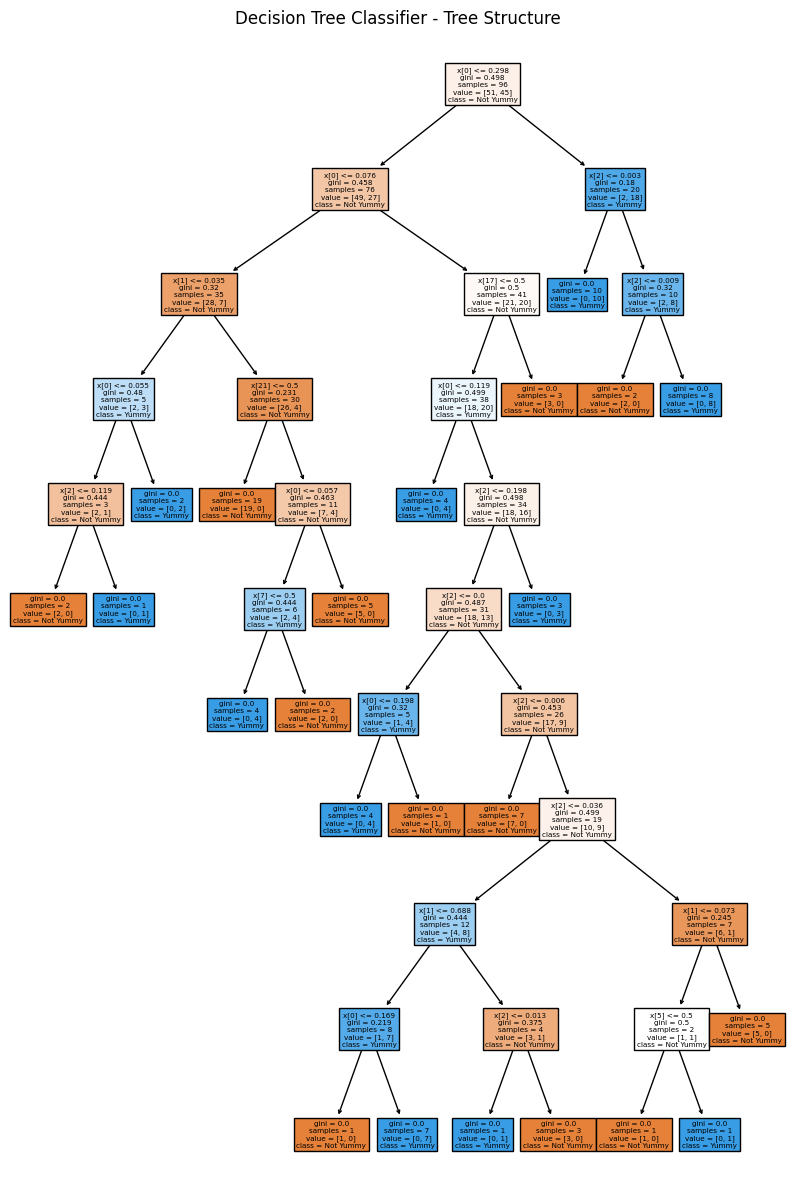

In [11]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Display the tree structure
plt.figure(figsize=(10, 15))  # Adjust the figure size as needed
plot_tree(DecisionTreeClassifier().fit(X_train, y_train), filled=True, class_names=['Not Yummy', 'Yummy'])
plt.title("Decision Tree Classifier - Tree Structure")
plt.show()